# Image classification tutorial 
For this project, I first created a virtual environment in conda.
Installed pip,matplotlib, tensorflow. 
Set this conda environment on my jupyter notebook, by installing ipykernel.

In [3]:
import tensorflow as tf
from tensorflow import keras

In [3]:
tf.__version__

'2.2.0-rc3'

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
#Load data from keras
fashion_mnist = keras.datasets.fashion_mnist

In [6]:
#The dataset returns 4 numpy arrays of train and test data (Image ranges 28*28 arrays, pixel values 0-255, labels 0-9, no class name)
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [7]:
#Define class names for labels
class_names = ["Top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal","Shirt", "Sneaker", "Bag", "Ankle boot"]

### Explore the data 

In [8]:
#Check dimension of train images (60,000 images, each image represented by 28*28 numpy pixels)
train_images.shape

(60000, 28, 28)

In [9]:
#Explore Labels show 0 to 9 int labels 
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [10]:
#Check size of test set
test_images.shape

(10000, 28, 28)

### Inspect an image

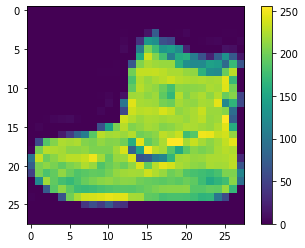

In [11]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Image pixel values fall in the range of 0-255. Before feeding to NN model, we have to scale the images to a value of 0 to 1. So, divide them by 255.

## Pre-process data

In [12]:
#Both train and test data need to be sclaed
train_images = train_images / 255.0
test_images = test_images / 255.0


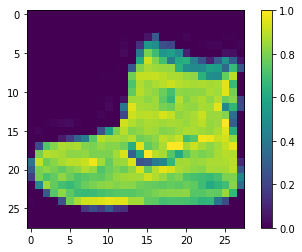

In [13]:
#Re-inspect an image to ensure pre-processing is done
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Image has been scaled to a value of 0 to 1

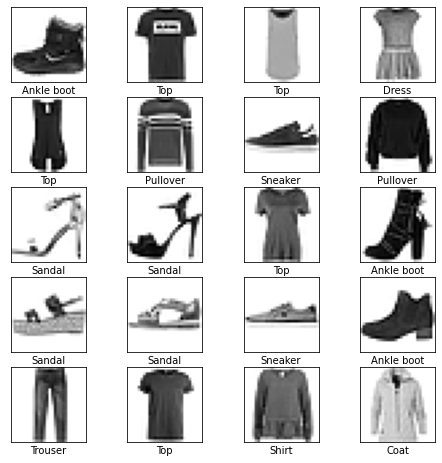

In [26]:
#Investigate the first 20 images before model building
plt.figure(figsize = (8, 8)) #Without figsize xlabels are hidden
for i in range(20):
    plt.subplot(5, 4, i+1) #Subplot lets you plot multiple subplots (nrows, ncols, index)
    plt.xticks([]) #hides ticks, which otherwise shows 0-25
    plt.yticks([])
    plt.grid(False)
    plt.xlabel(class_names[train_labels[i]]) #not clear how classes are assigned to labels
    plt.imshow(train_images[i], cmap=plt.cm.binary)  #using cmap = 'gray' gives black bg
plt.show()

### Building the Neural Network Model

In [31]:
#Building layers
model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)), #Layer to flatten 2D array of px to 28*28 1D array
        keras.layers.Dense(128, activation='relu'), #128 and 10 below are no. of nodes
        keras.layers.Dense(10, activation='softmax') #returns output as 10 probability scores (for labels) that sums up to 1
])


In [32]:
#Compiling model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
             )

In [33]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4994 - accuracy: 0.8238: 1s - ETA: 0s - loss: 0.5085 - accura - ETA: 0s - loss: 0.4998 - accuracy: 0.82
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3740 - accuracy: 0.8649
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3373 - accuracy: 0.8768
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3122 - accuracy: 0.8857
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2967 - accuracy: 0.8918
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2825 - accuracy: 0.8958
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2708 - accuracy: 0.9002: 0s - loss: 0.2706 - accuracy: 
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2580 - accuracy: 0.9045
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - lo

In [35]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print('Accuracy of test set: ', test_accuracy)

313/313 [==============================] - 0s 1ms/step - loss: 0.3390 - accuracy: 0.8820
Accuracy of test set:  0.8820000290870667
